In [1]:
import sys
c = 'C:\\SET.IIT\\V\\p\\ddf_p\\ddf_p'
if c not in sys.path: sys.path.append(c)

import numpy as np
import scipy
import scipy.sparse as sps
import porepy as pp

import ddf.common as co
import ddf.hrl as hrl

from ddf.plot import quiver, plot_cells, streamplot
from ddf.immagini import *

from tabulate import tabulate

In [2]:
pbs = {}
gbs = {}

In [3]:
def run(nome, vg14_kwargs, eig_kwargs={}, imp_kwargs={}):
    print(nome, end=' ')

    imp = dict(cartella='../simulazioni/eig_vg14', nome=nome, parla=4, campi_post=[]) | imp_kwargs
    pb = co.pkl(imp)

    vg14_kwargs = dict(tipo_griglia='triangolare') | vg14_kwargs
    eig_kwargs = dict(post=0, k=5, tol=1e-8) | eig_kwargs
    
#     if pb is not None:
#         # controllo se ho caricato una simulazione identica
#         mdg, dati = hrl.vg14(**vg14_kwargs)
#         assert pb.mdg.subdomains()[0].num_cells == mdg.subdomains()[0].num_cells
    
    if pb is None:
        mdg, dati = hrl.vg14(**vg14_kwargs)
        pb = hrl.HRL(mdg, dati, imp)
        pb.init()
        print(f'({pb._M.shape[0]})', end=' ')
        pb.steady_state()
        eig = pb.eig(**eig_kwargs)
        print(f'({eig.matvec_count}) ', eig.vals)
        pb.esporta(stato=1, pkl=1)

    return pb

In [4]:
Ra_1 = 9.988363636363633 # 0.7*0.1*10*1.6e-16*9.81*1000/(0.1*1e-9*1.1e-3)
Ra_c = 4*np.pi**2
ln = { 'A': 1/4 * Ra_c/Ra_1, 'B': (1-0.01) * Ra_c/Ra_1, 'C': (1+0.01) * Ra_c/Ra_1, 'D': 1.5 * Ra_c/Ra_1, }

for l,n in ln.items():
    nome = f'0{l}'; gome = nome + 'g'
#     pbs[nome] = run(nome, dict(lettera='0', numero=n, grid_scale=1.00, tipo_griglia='quadrata'))
    pbs[nome] = run(nome, dict(lettera='0', numero=n, grid_scale=1.00, tipo_griglia='quadrata'), dict(ks=1))
    gbs[nome] = run(gome, dict(lettera='0', numero=n, grid_scale=0.75, tipo_griglia='quadrata'))

0A 0Ag 0B 0Bg 0C 0Cg 0D 0Dg 

In [5]:
for n in [1,2,3,4]:
    nome = f'A{n}'; gome = nome + 'g'
    pbs[nome] = run(nome, dict(lettera='A', numero=n, grid_scale=0.8))
    gbs[nome] = run(gome, dict(lettera='A', numero=n, grid_scale=0.6))
    
for n in [1,2,3,4]:
    nome = f'B{n}'; gome = nome + 'g'
    pbs[nome] = run(nome, dict(lettera='B', numero=n, grid_scale=0.8))
    gbs[nome] = run(gome, dict(lettera='B', numero=n, grid_scale=0.6))

n = 1; nome = f'C{n}'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='C', numero=n, grid_scale=0.80), dict(ks=1)); gbs[nome] = run(gome, dict(lettera='C', numero=n, grid_scale=0.60), dict(ks=1))
n = 2; nome = f'C{n}'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='C', numero=n, grid_scale=1.10), dict(ks=1)); gbs[nome] = run(gome, dict(lettera='C', numero=n, grid_scale=0.85), dict(ks=1))
n = 3; nome = f'C{n}'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='C', numero=n, grid_scale=1.25), dict(ks=1)); gbs[nome] = run(gome, dict(lettera='C', numero=n, grid_scale=1.00), dict(ks=1))
n = 4; nome = f'C{n}'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='C', numero=n, grid_scale=0.80), dict(ks=1)); gbs[nome] = run(gome, dict(lettera='C', numero=n, grid_scale=0.60), dict(ks=1))

A1 A1g A2 A2g A3 A3g A4 A4g B1 B1g B2 B2g B3 B3g B4 B4g C1 C1g C2 C2g C3 C3g C4 C4g 

In [22]:
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    nome = f'D{n}'; gome = nome + 'g'
    pbs[nome] = run(nome, dict(lettera='D', numero=n, grid_scale=0.8), dict(k=8))
    gbs[nome] = run(gome, dict(lettera='D', numero=n, grid_scale=0.6), dict(k=8))
    
nome = 'E9a'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='E', numero='9a', grid_scale=1.00), dict(k=10, ks=1)); gbs[nome] = run(gome, dict(lettera='E', numero='9a', grid_scale=0.75), dict(k=10, ks=1))
nome = 'E9b'; gome = nome + 'g'; pbs[nome] = run(nome, dict(lettera='E', numero='9b', grid_scale=1.15), dict(k=12, ks=1)); gbs[nome] = run(gome, dict(lettera='E', numero='9b', grid_scale=0.85), dict(k=12, ks=1))

D1 D1g D2 D2g D3 


c:\set.iit\v\p\ddf_p\ddf_p\porepy\src\porepy\grids\mortar_grid.py:693: UserWarning: Is it really meaningful to ask for signs of a one sided mortar grid?
  warnings.warn(


(4064) 0.00: (0) sol: [    3.12    0.993        0        0] theta: 0.0
0.00: (1) sol: [    3.12    0.993   0.0184    0.353]  inc: [0.000588   0.0366   0.0184    0.353]
0.00: (2) sol: [    3.12    0.993   0.0184    0.353]  inc: [6.06e-07    0.028 2.46e-05 8.16e-05]
0.00: (3) sol: [    3.12    0.993   0.0184    0.353]  inc: [3.51e-09 1.85e-08 1.93e-07 4.51e-07]
0.00: (4) sol: [    3.12    0.993   0.0184    0.353]  inc: [4.96e-14 1.26e-14 2.82e-13 8.49e-15]

(0)  [ 41.744996    -9.86434904 -14.05761081 -16.434962   -39.393455
 -41.39171297 -43.68416618 -47.90269343]
D3g 
(2376) 0.00: (0) sol: [    3.12     0.99        0        0] theta: 0.0
0.00: (1) sol: [    3.12     0.99   0.0281    0.462]  inc: [0.000975   0.0824   0.0281    0.462]
0.00: (2) sol: [    3.12     0.99    0.028    0.462]  inc: [1.45e-06   0.0712 6.18e-05 0.000169]
0.00: (3) sol: [    3.12     0.99    0.028    0.462]  inc: [3.11e-08 1.24e-07 1.89e-06 2.91e-06]
0.00: (4) sol: [    3.12     0.99    0.028    0.462]  inc: [3.4

In [7]:
nomi = [ nome for nome in hrl.sh_vg14.keys() if nome in pbs.keys() and nome in gbs.keys() ]

def err_rel_griglia(nome):
    vals = pbs[nome]._eig.vals
    gals = gbs[nome]._eig.vals
    err_rel = (vals - gals)/vals
    return np.abs(err_rel)

tabella = [
    { 'nome': nome, 'sh': hrl.sh_vg14[nome] } | 
#     { f'l{i}': val for i,val in enumerate(pbs[nome]._eig.vals) }
    { f'l{i}': pbs[nome]._eig.vals[i] for i in range(5) } |
    {
        'eps': np.linalg.norm([pbs[nome]._eig.err_rel[i] for i in range(5)], np.inf),
        'eps_g': np.linalg.norm(err_rel_griglia(nome)[:5], np.inf),
        'dof/dofg': pbs[nome]._M.shape[0] / gbs[nome]._M.shape[0],
        'dof': int(pbs[nome]._M.shape[0]), 
#         'nc': pbs[nome].mdg.subdomains()[0].num_cells,
        'mv': pbs[nome]._eig.matvec_count,
    }
    for nome in nomi
]

print( tabulate(tabella, floatfmt=".3f", headers='keys') )
# for r in tabella: print(f'{r["nome"]:<5} & {r["sh"]:>5.2f} & {r["l0"]:>7.2f} & {r["l1"]:>7.2f} & {r["l2"]:>7.2f} & {r["l3"]:>7.2f} & {r["l4"]:>7.2f} & {r["eps"]:>8.5f} & {r["eps_g"]:>8.5f} & {r["dof/dofg"]:>5.2f} \\\\')

nome       sh       l0       l1       l2       l3       l4    eps    eps_g    dof/dofg    dof     mv
------  -----  -------  -------  -------  -------  -------  -----  -------  ----------  -----  -----
0A      1.000   -9.868  -10.362  -14.803  -25.236  -39.447  0.000    0.001       1.778   8192    651
0B      1.000   -0.205   -4.522   -5.025   -9.868  -18.070  0.000    0.030       1.778   8192    567
0C      1.000    0.189   -4.364   -4.478   -9.868  -17.439  0.000    0.033       1.778   8192    610
0D      1.000    9.856    8.905   -0.497   -1.974   -9.868  0.000    0.006       1.778   8192    593
A1      1.000   -9.867  -10.880  -16.606  -25.551  -39.343  0.000    0.001       1.841   6865      0
A2      1.360   51.917   30.364    2.302   -9.866  -39.432  0.003    0.014       1.862   7360      0
A3      1.560   16.030   13.452    8.438    0.173   -6.438  0.074    0.075       1.928   8614      0
A4      1.750   11.085   10.986    0.690   -0.171   -9.866  0.007    0.035       1.471   99

In [8]:
# sh = np.array([ hrl.sh_vg14[nome] for nome in nomi ]) - 1
# npos = np.array([ np.sum(pbs[nome]._eig.vals > 0) for nome in nomi ])
# eig0 = np.array([ pbs[nome]._eig.vals[0] for nome in nomi ])


# fig,ax = plt.subplots(figsize=(linewidth/2,linewidth/2), dpi=600)

# ax.scatter(eig0, npos, c='white')
# for i,nome in enumerate(nomi):
#     ax.text( eig0[i], npos[i], nome, fontsize=sh[i]*6, va='center', ha='center')
# # #     ax.text( eig0[i], npos[i], nome)
# ax.set_xscale('symlog')

In [9]:
tabella = [
    { 'nome': nome, 'sh': hrl.sh_vg14[nome]} | 
    { f'l{i}': val for i,val in enumerate(pbs[nome]._eig.vals) }
    for nome in nomi
]
print( tabulate(tabella, floatfmt=".2f", headers='keys') ); print('\n')

tabella = [
    { 'nome': nome} | 
    { f'eps{i}': eps for i,eps in enumerate(pbs[nome]._eig.err_rel) }
    for nome in nomi
]
print( tabulate(tabella, floatfmt=".4f", headers='keys') ); print('\n')

tabella = [
    { 'nome': nome, 'dof/dof_g': pbs[nome]._M.shape[0]/gbs[nome]._M.shape[0] } | 
    { f'eps{i}': eps for i,eps in enumerate(err_rel_griglia(nome)) }
    for nome in nomi
]
print( tabulate(tabella, floatfmt=".4f", headers='keys') ); print('\n')

nome      sh      l0      l1      l2      l3      l4      l5      l6      l7      l8      l9     l10     l11
------  ----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------
0A      1.00   -9.87  -10.36  -14.80  -25.24  -39.45
0B      1.00   -0.21   -4.52   -5.02   -9.87  -18.07
0C      1.00    0.19   -4.36   -4.48   -9.87  -17.44
0D      1.00    9.86    8.90   -0.50   -1.97   -9.87
A1      1.00   -9.87  -10.88  -16.61  -25.55  -39.34
A2      1.36   51.92   30.36    2.30   -9.87  -39.43
A3      1.56   16.03   13.45    8.44    0.17   -6.44
A4      1.75   11.08   10.99    0.69   -0.17   -9.87
B1      1.00   -9.87  -10.76  -15.70  -24.87  -39.43
B2      1.13   31.29   26.31    0.96   -9.87  -18.21
B3      1.49   15.31    9.31    1.63   -4.05   -9.87
B4      1.32   11.62    4.39   -0.54   -3.63   -9.87
C1      1.00   -9.87  -10.59  -13.33  -26.06  -39.43
C2      1.17    1.90    0.91   -4.11   -9.87  -39.45
C3      1.21    1.02   -1.06   -8.18   -

In [10]:
# fig,ax = plt.subplots(figsize=(linewidth*0.7, linewidth*0.7/2))
# pb = pbs['0B']
# plot_cells(pb, pb._eig.funs[:,0], ax=ax, cmap=cmap_dw, method='cubic', Nx=512)
# # quiver(pb, 'eig_uvel0', skip=7, width=1e-3, ax=ax)
# fig.savefig('../immagini/p/1.png', transparent=1, bbox_inches='tight')

In [11]:
def peig(pb, axs):
    for j,ax in enumerate(axs):
        norm = np.linalg.norm(pb._eig.funs[:,j], np.inf)
        plot_cells( pb, pb._eig.funs[:,j], ax=ax, cmap=cmap_dw, vmin=-norm, vmax=norm, fratture_lw=1 )
#         streamplot( pb, f'eig_uvel{j}', max_speed=max_speed, ax=axs[i,j], density=1, max_lw=0.6, arrowsize=0.3 )
        bbox = dict(facecolor='white', boxstyle='square,pad=0.3', edgecolor='lightgrey' if pb._eig.vals[j] < 0 else 'black')
        ax.text(20, 0.5, r'$ \lambda_{%d} = %.2f $' % (j+1, pb._eig.vals[j]), fontsize='small', ha='right', bbox=bbox)


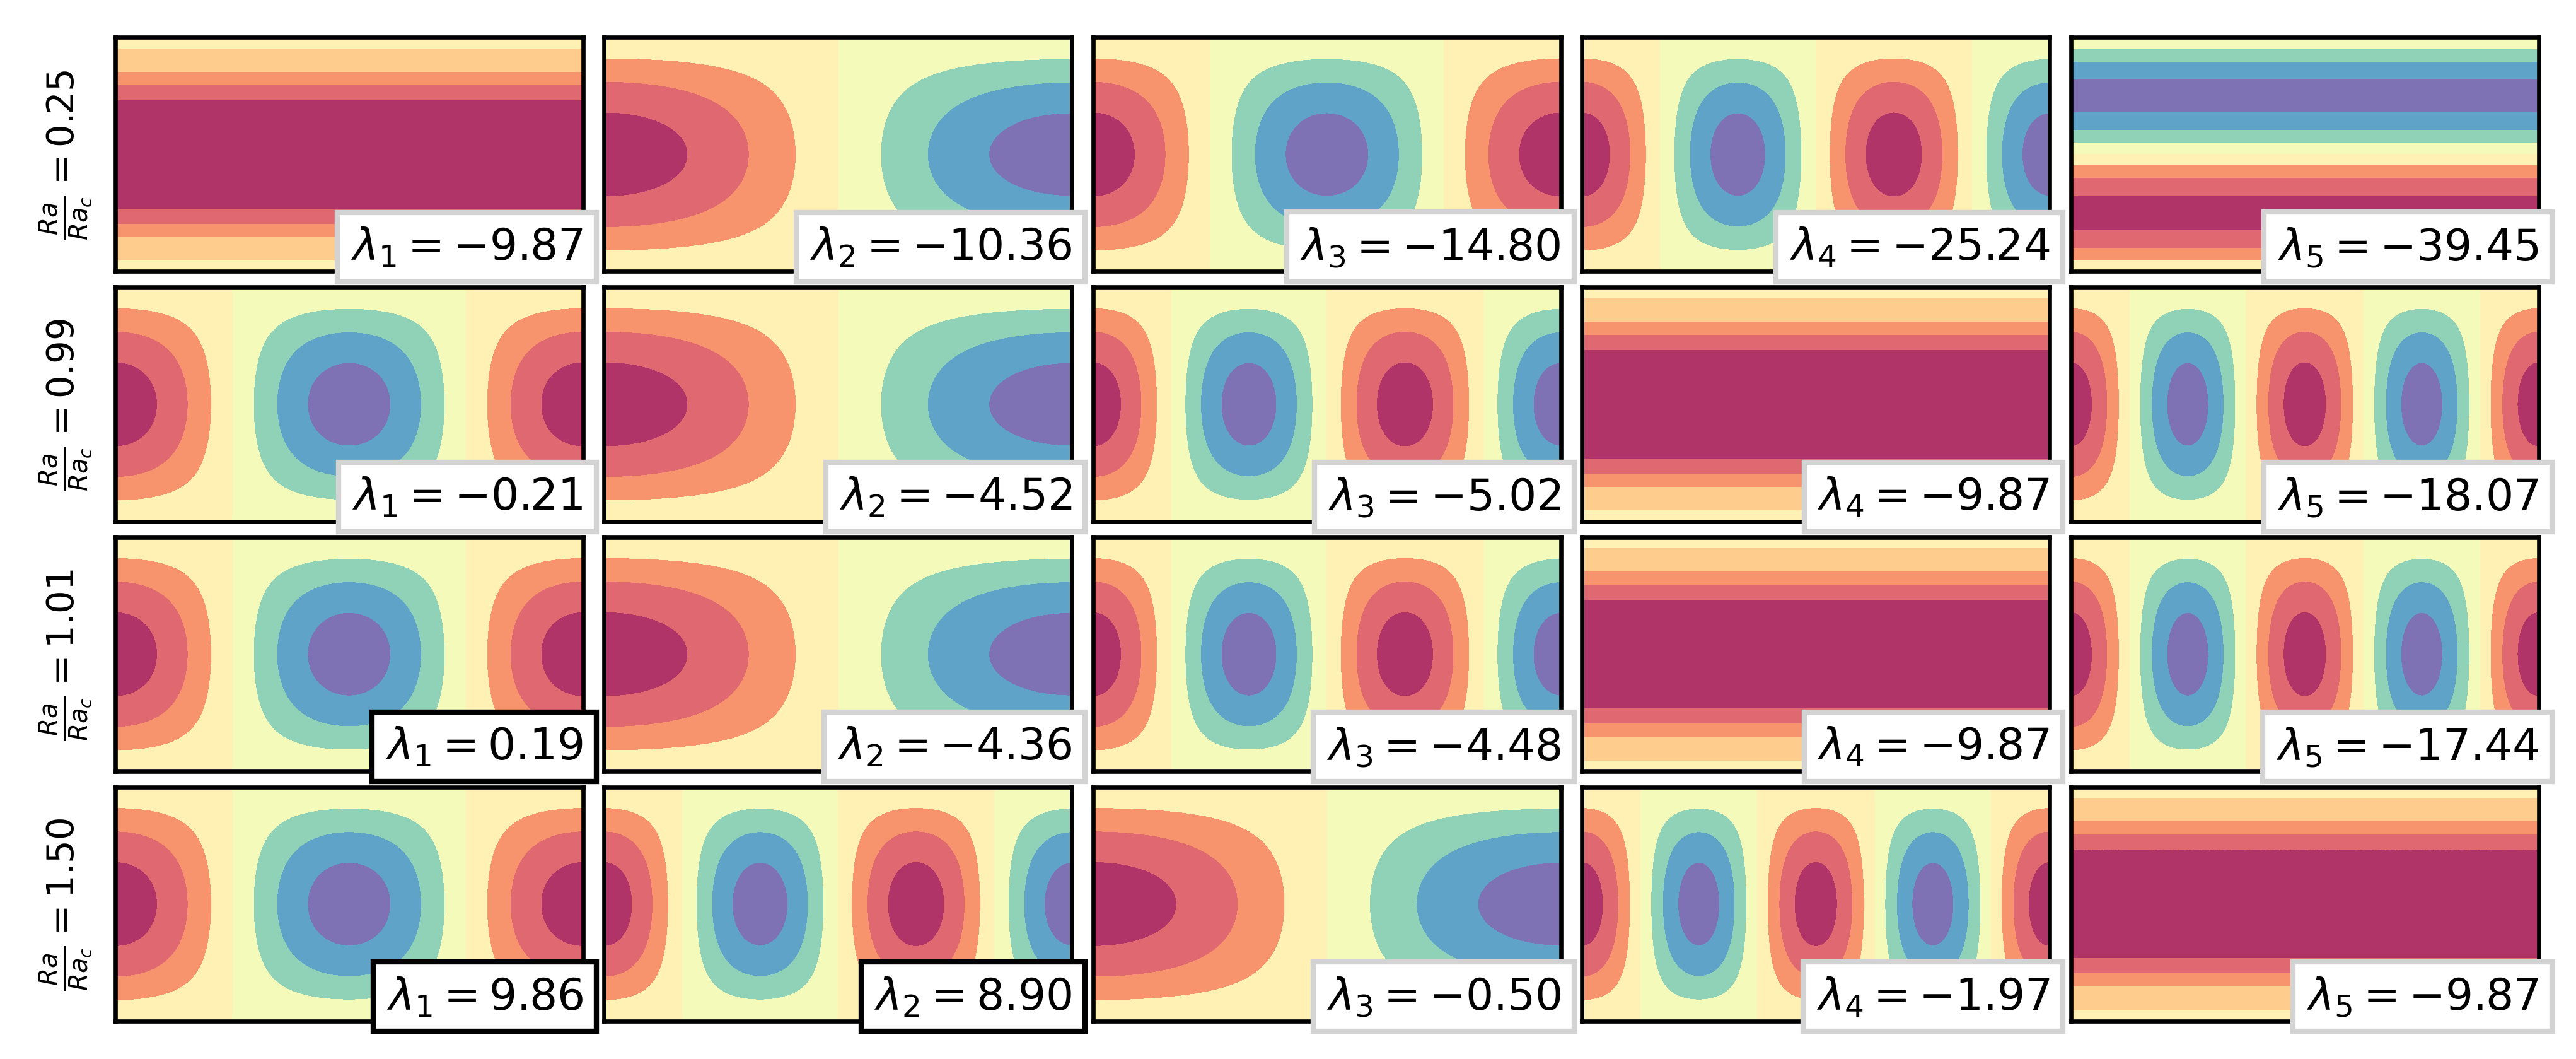

In [12]:
fig,axs = plt.subplots(4,5, figsize=(linewidth, linewidth/5/2*4))

for i,l in enumerate(ln.keys()):
    pb = pbs[f'0{l}']
    peig(pb, axs[i])
    axs[i,0].set_ylabel(r"$ \frac{Ra}{Ra_c} = %.2f $" % (pb.car['Ra']/Ra_c), fontsize='x-small')

fig.tight_layout(pad=0.3)
fig.savefig('../immagini/eig_vg14_0.png', **sf_kw|dict(pad_inches=0.05))

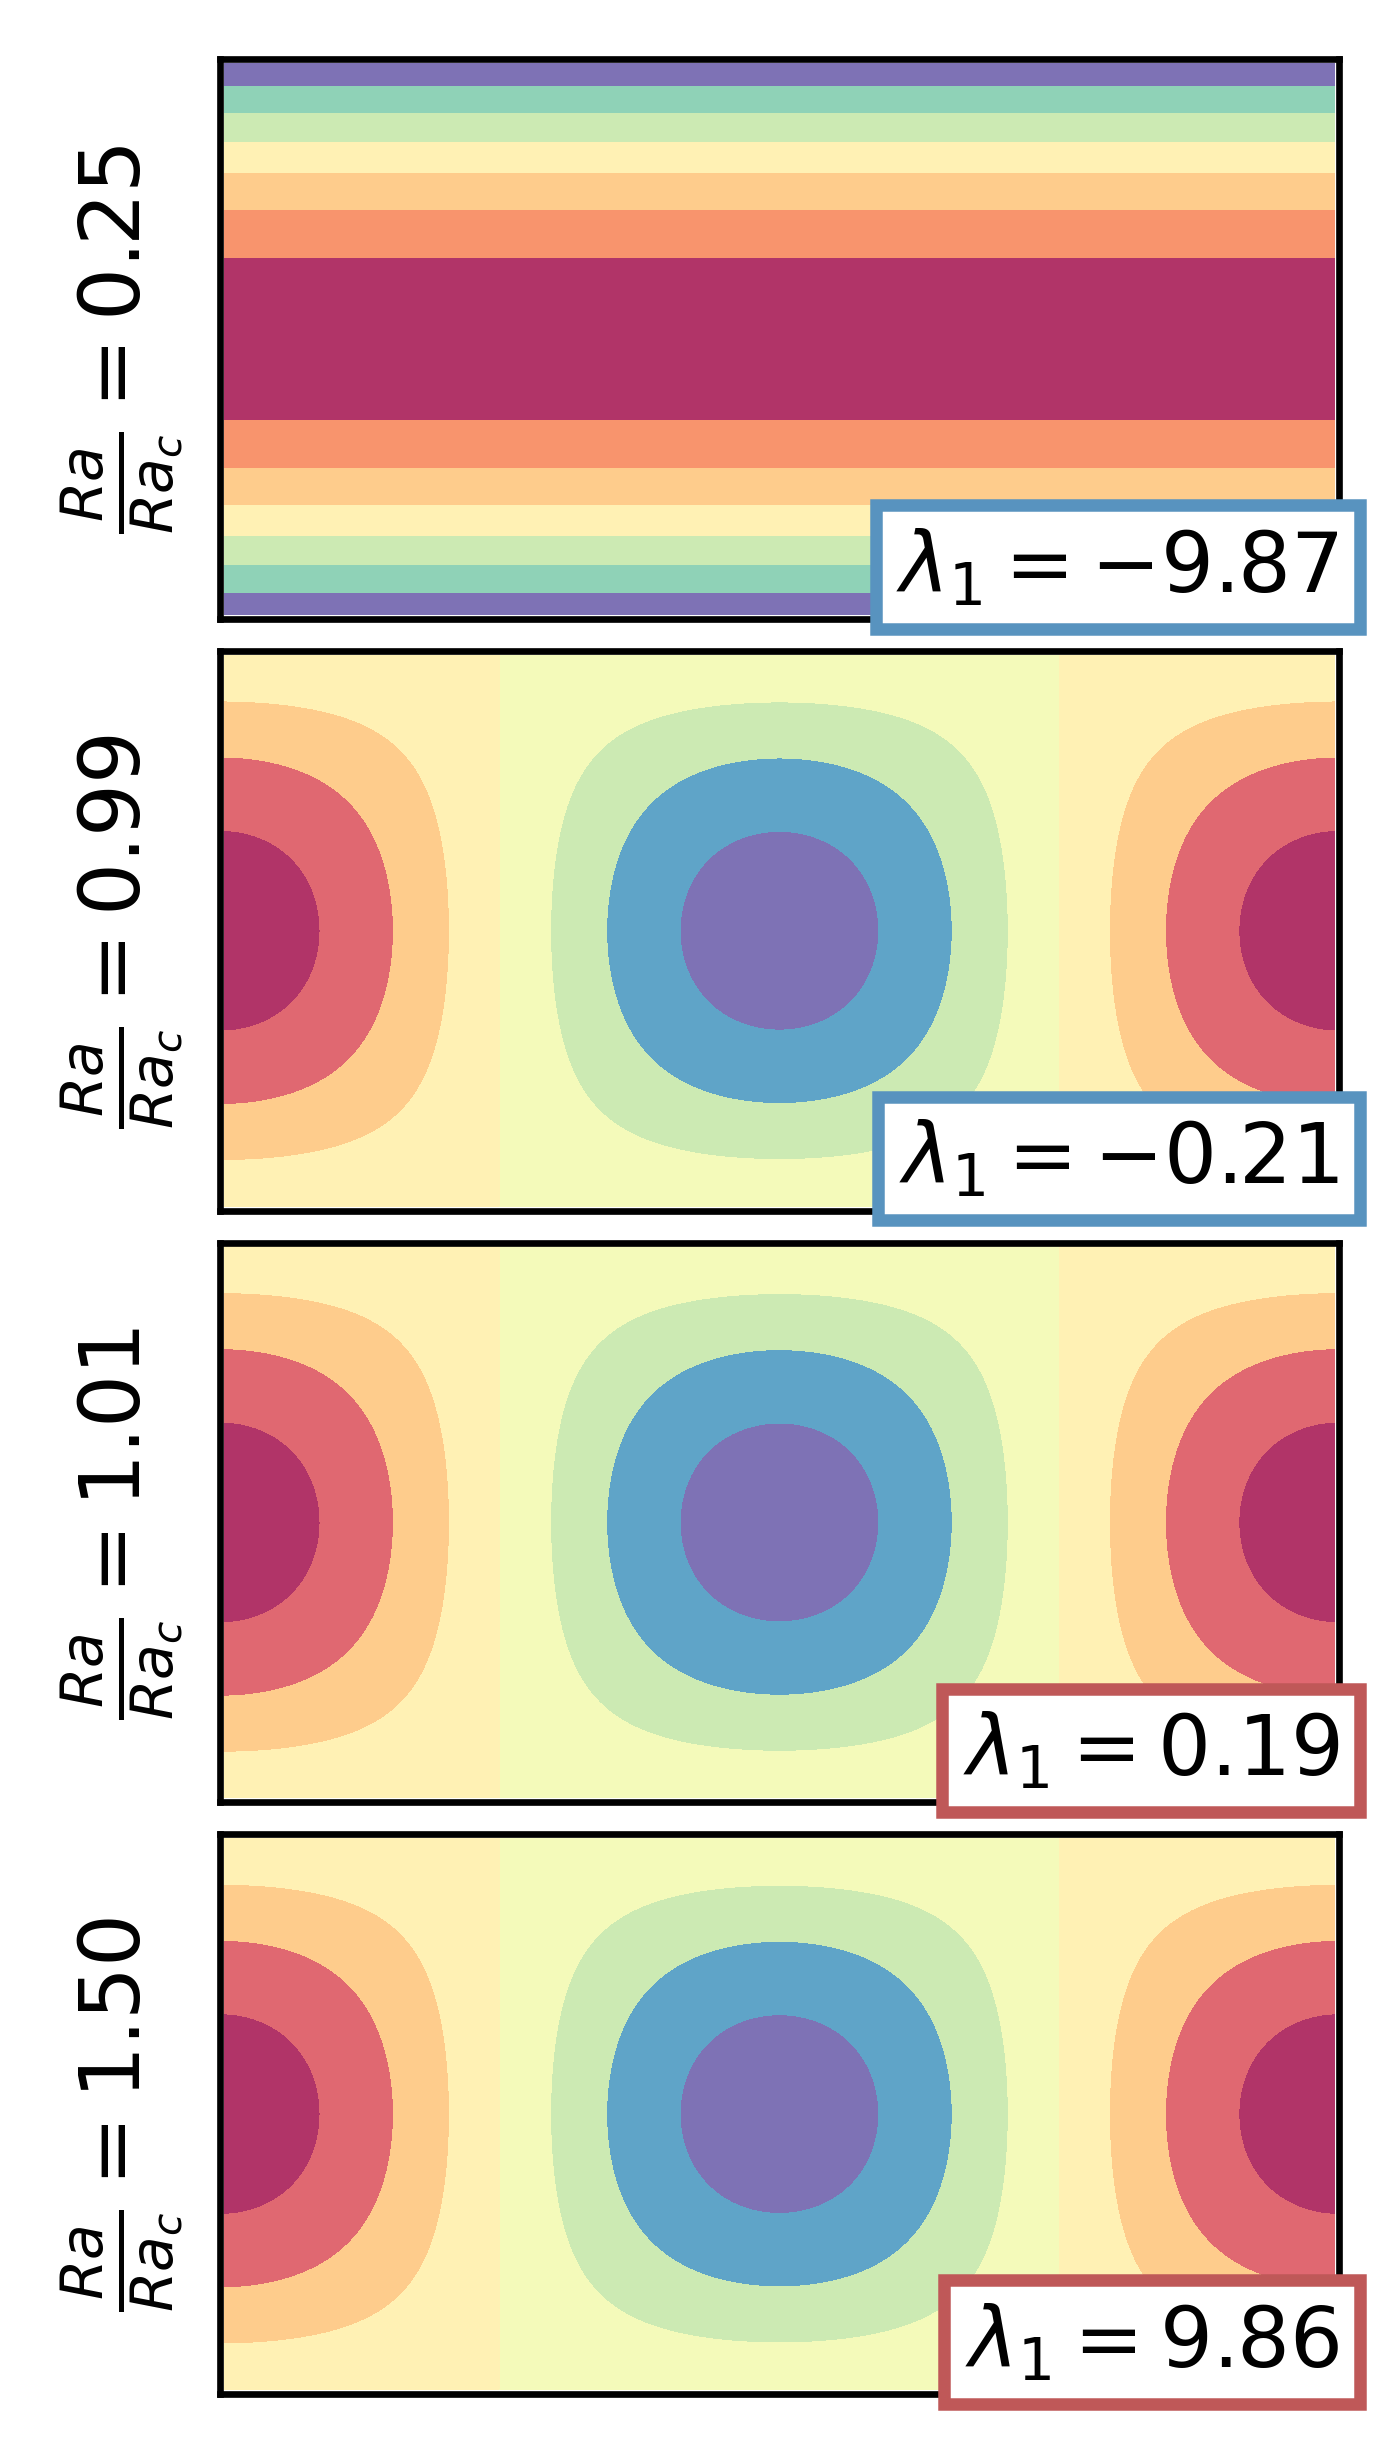

In [13]:
fig,axs = plt.subplots(4, 1, figsize=(linewidth*.3, linewidth*.3/1/2*4*.98))
axs = axs.flatten()

for i,l in enumerate(ln.keys()):
    ax = axs[i]
    pb = pbs[f'0{l}']
    pos = pb._eig.vals[0] > 0
    plot_cells(pb, pb._eig.funs[:,0], ax=ax, cmap=cmap_dw, fratture_lw=1)
    bbox = dict(facecolor='white', boxstyle='square,pad=0.25', edgecolor=rosso if pos else blu, linewidth=1.5)
    ax.text(20, 0.5, r'$ \lambda_1 = %.2f $' % (pb._eig.vals[0]), fontsize='medium', ha='right', bbox=bbox)
    ax.set_ylabel(r"$ \frac{Ra}{Ra_c} = %.2f $" % (pb.car['Ra']/Ra_c), fontsize='medium')

fig.tight_layout(pad=0)
fig.savefig('../immagini/eig_vg14_R0.png', **sf_kw|dict(pad_inches=0.05))

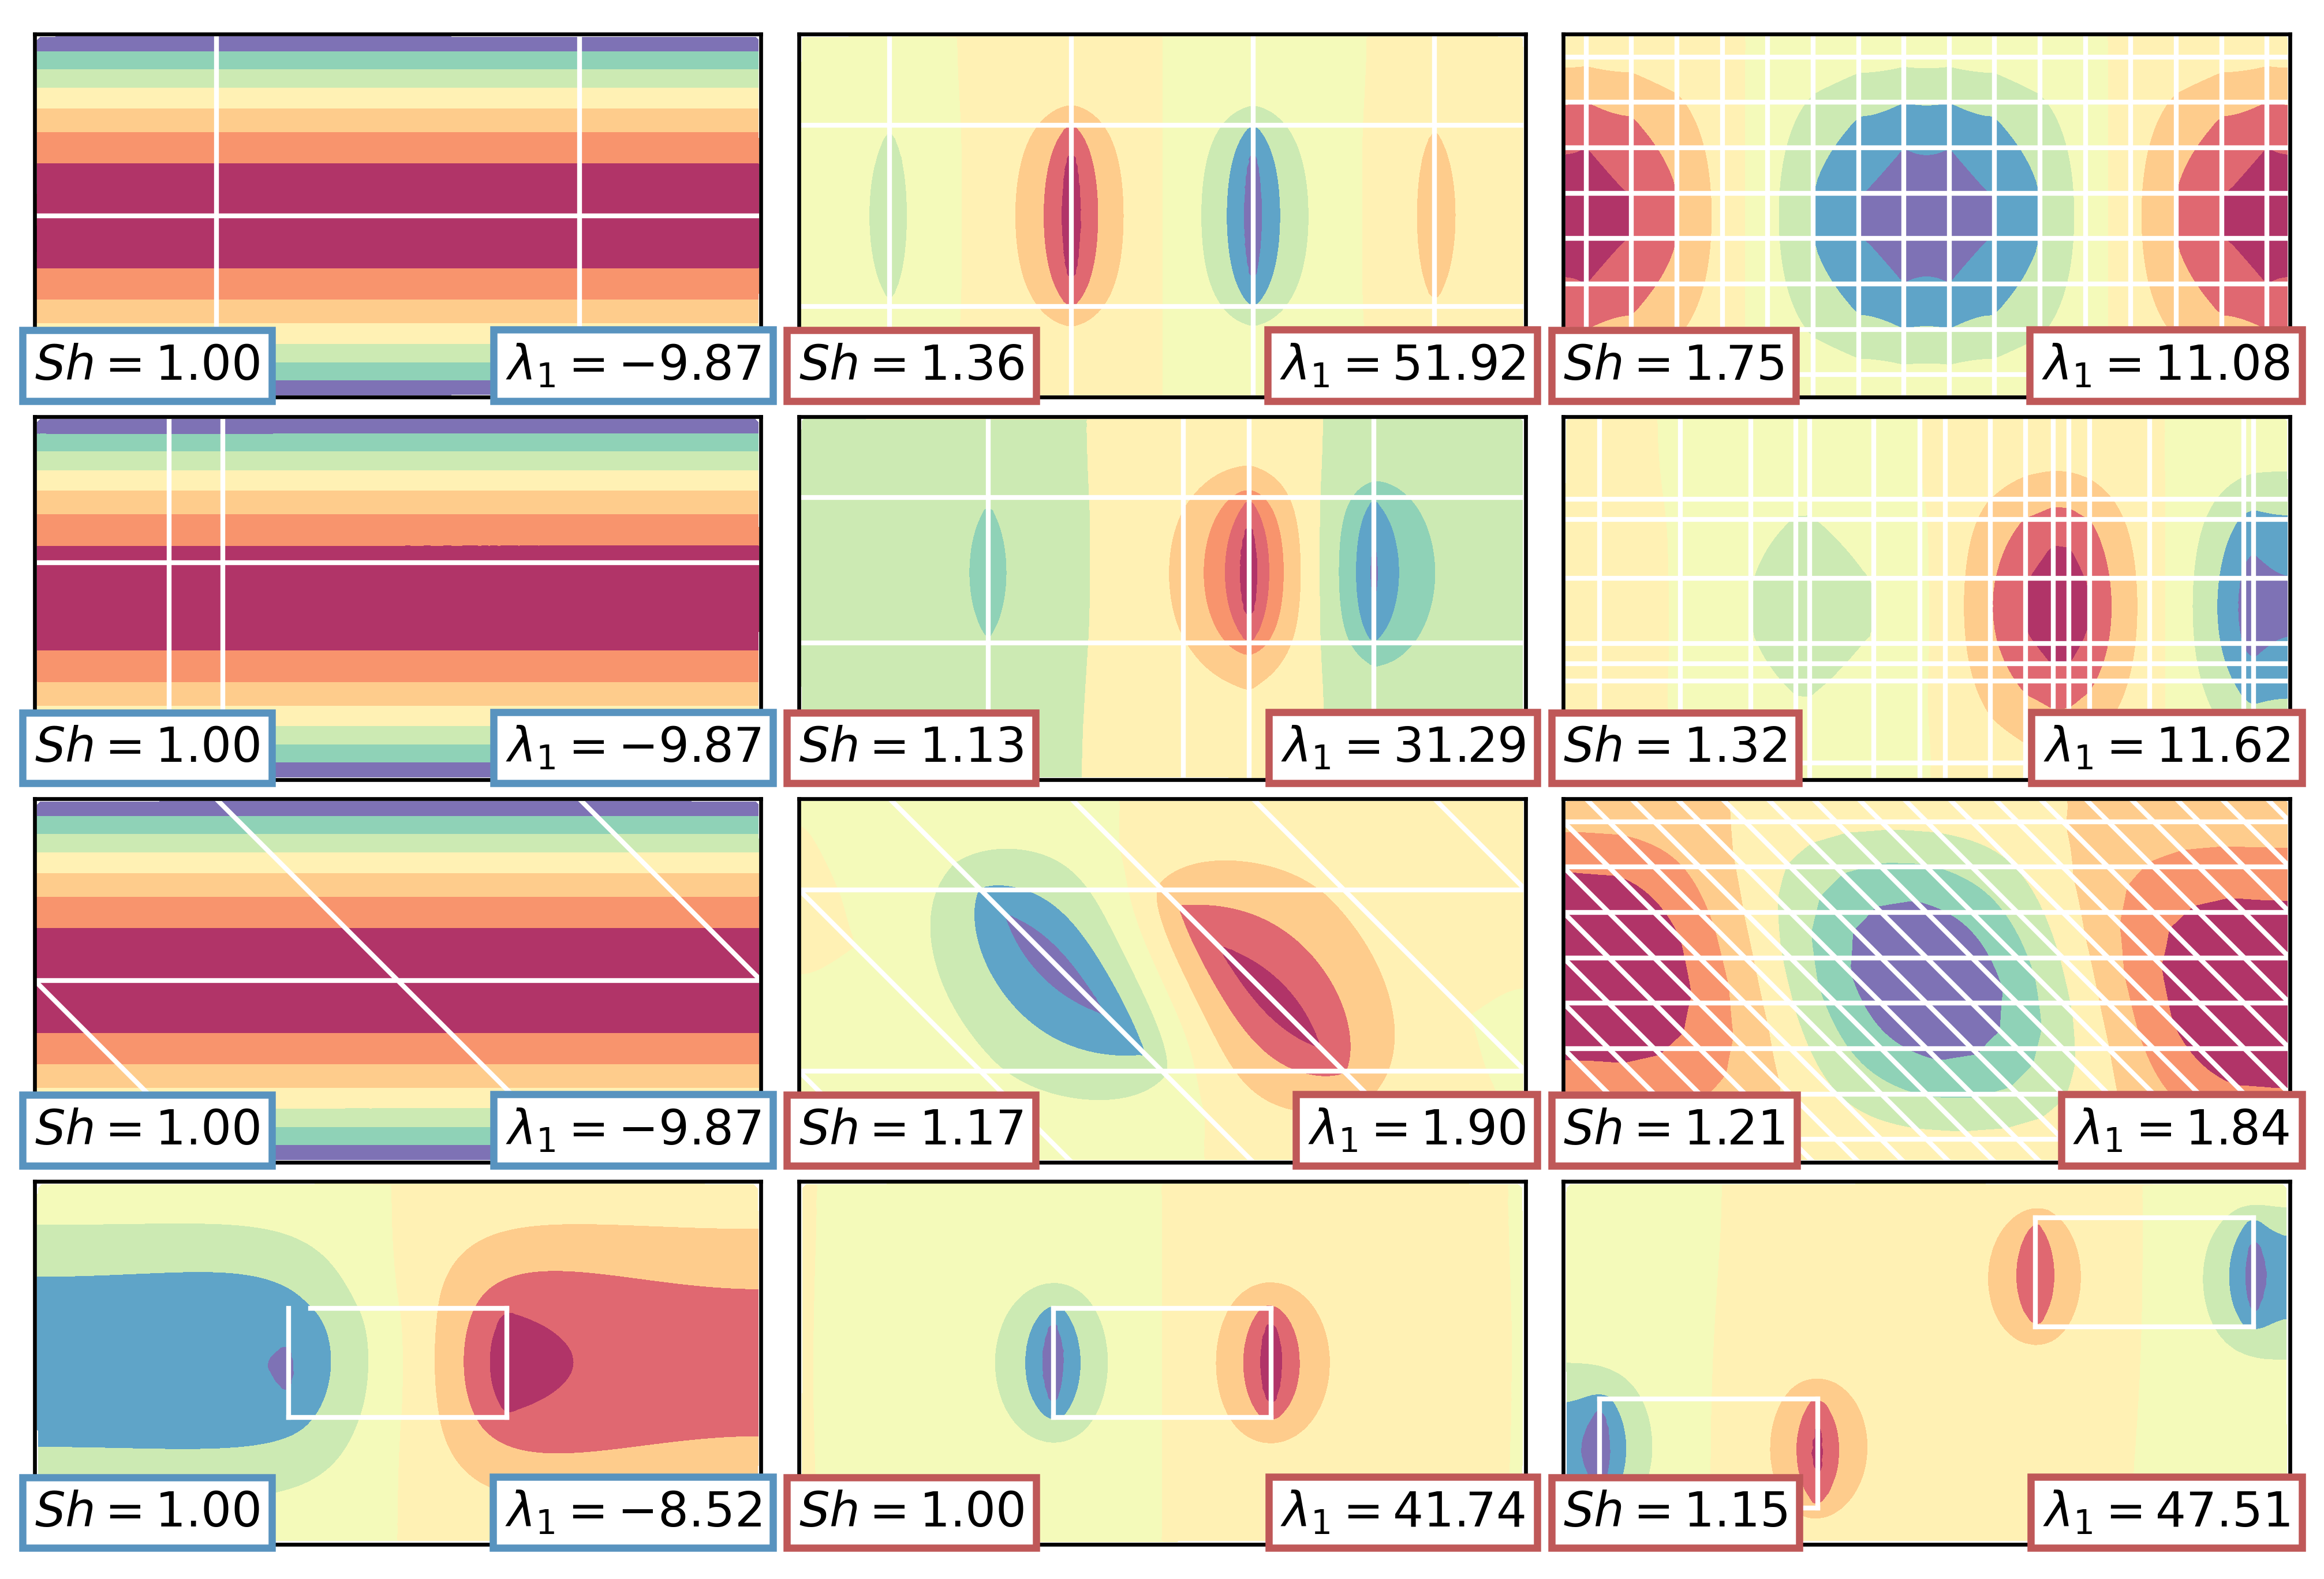

In [14]:
fig,axs = plt.subplots(4, 3, figsize=(linewidth, linewidth/3/2*4))
axs = axs.flatten()

nomi = [ 
    'A1', 'A2', 'A4', 
    'B1', 'B2', 'B4', 
    'C1', 'C2', 'C4', 
    'D2', 'D3', 'D8',
]

for nome,ax in zip(nomi, axs):
    pb = pbs[nome]
    plot_cells(pb, pb._eig.funs[:,0], ax=ax, cmap=cmap_dw, fratture_lw=1)
    
    pos = pb._eig.vals[0] > 0
#     for mm in ['bottom', 'top', 'right', 'left']: 
#         ax.spines[mm].set_color(rosso if pos else blu)
#         ax.spines[mm].set_linewidth(2)
    bbox = dict(facecolor='white', boxstyle='square,pad=0.25', edgecolor=rosso if pos else blu, linewidth=1.5)
    ax.text(20, 0.5, r'$ \lambda_1 = %.2f $' % (pb._eig.vals[0]), fontsize='medium', ha='right', bbox=bbox)
    ax.text(0, 0.5, r'$ Sh = %.2f $' % (hrl.sh_vg14[nome]), fontsize='medium', ha='left', bbox=bbox)

    
fig.tight_layout(pad=0.4)
fig.savefig('../immagini/eig_vg14_R1.png', **sf_kw|dict(pad_inches=0.05))

In [15]:
# fig,axs = plt.subplots(12,5, figsize=(linewidth, linewidth/5/2*12))

# for i in range(12):
#     pb = pbs[f'D{1+i}']
#     peig(pb, axs[i])
#     axs[i, 0].set_ylabel(f'D{i+1}')

# fig.tight_layout(pad=0.3)
# # fig.savefig('../immagini/eig_vg14_D.png', transparent=1, bbox_inches='tight')

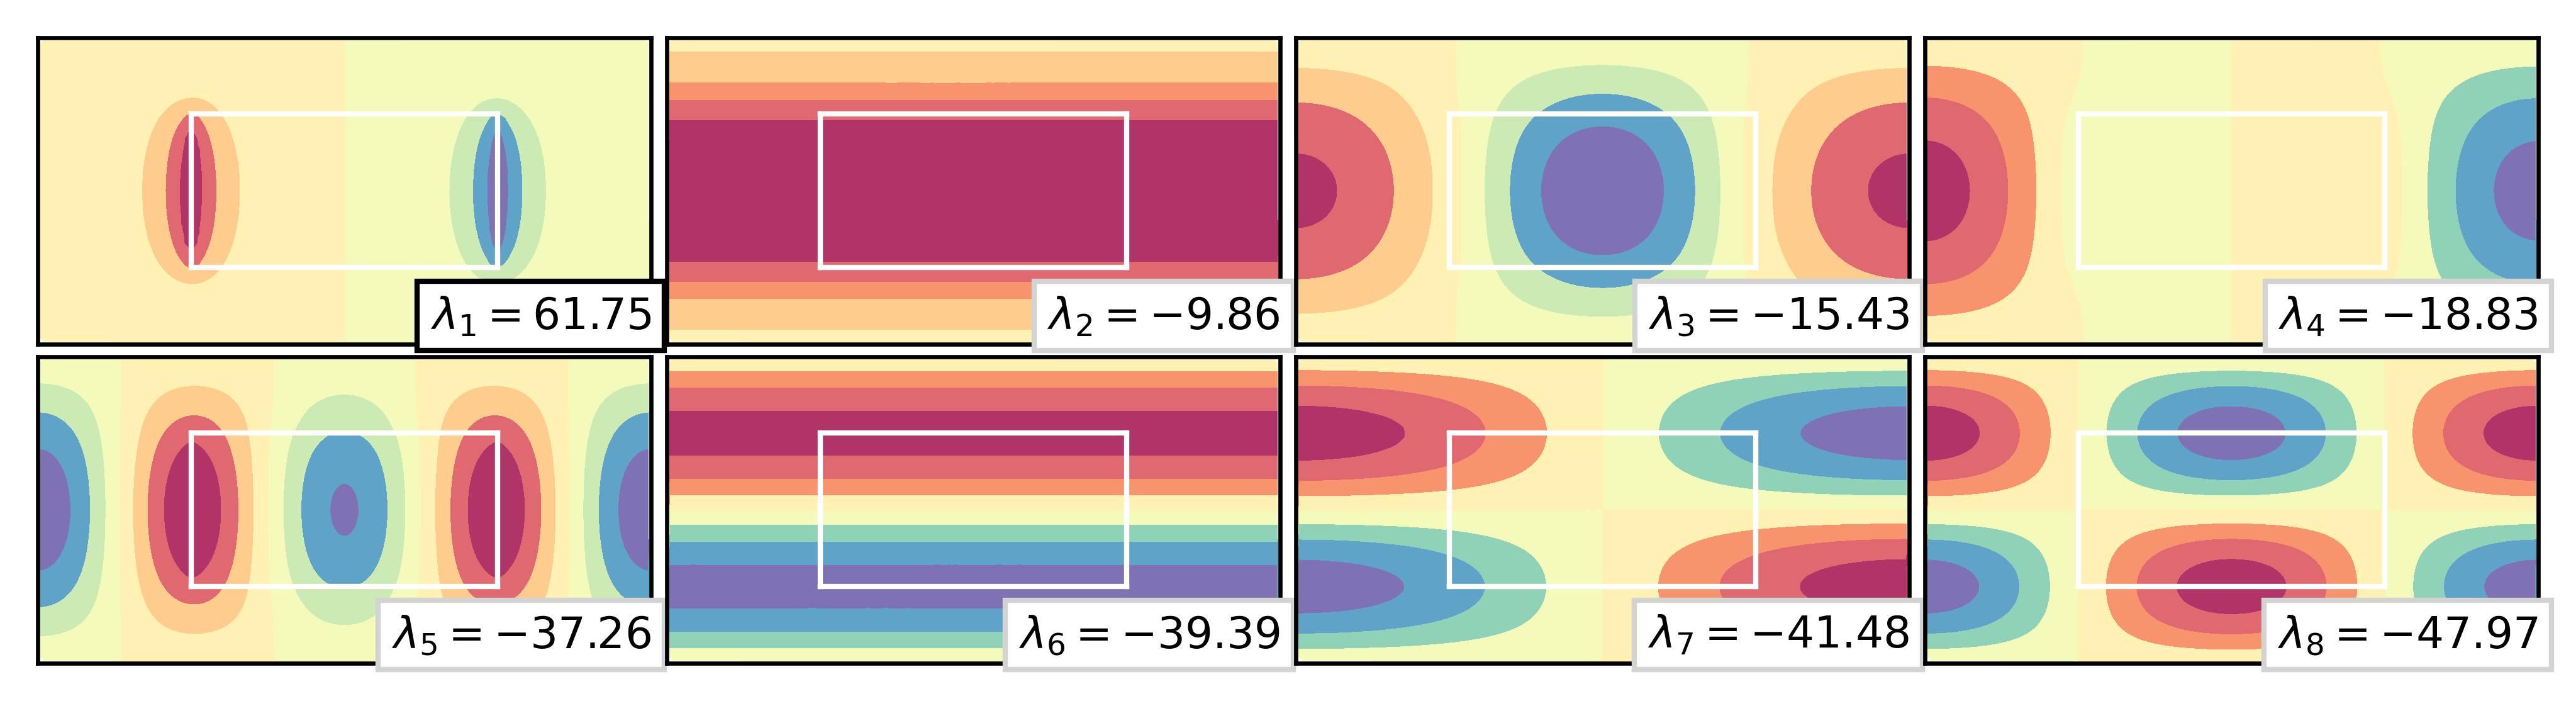

In [16]:
fig,axs = plt.subplots(2,4, figsize=(linewidth, linewidth/4/2*2*1.07))
pb = pbs[f'D11']
peig(pb, axs.flatten())
fig.tight_layout(pad=0.3)
fig.savefig('../immagini/eig_vg14_D11.png', **sf_kw|dict(pad_inches=0.05))

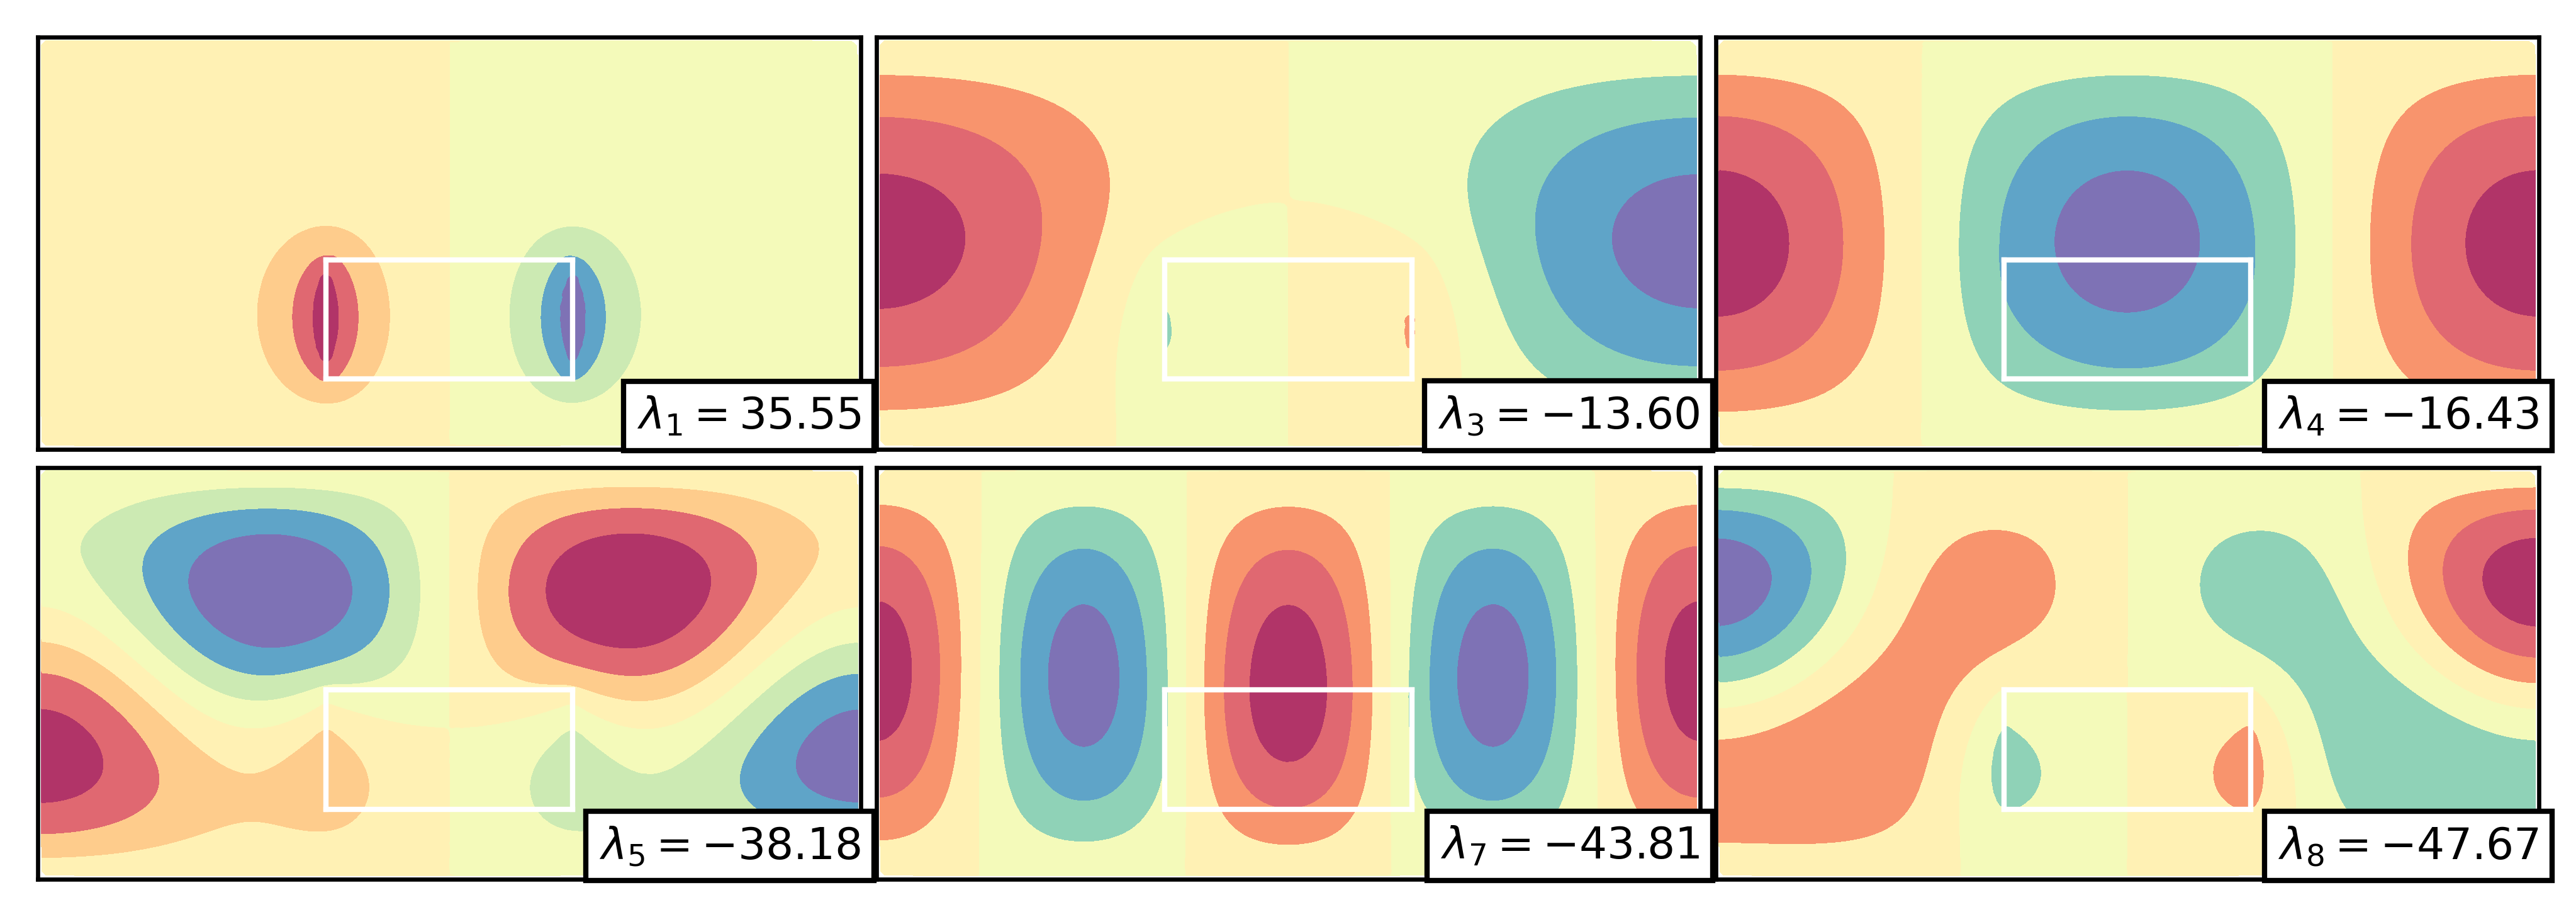

In [17]:
def ppeig(pb, axs, js):
    for j,ax in enumerate(axs):
        norm = np.linalg.norm(pb._eig.funs[:,js[j]], np.inf)
        plot_cells( pb, pb._eig.funs[:,js[j]], ax=ax, cmap=cmap_dw, vmin=-norm, vmax=norm, fratture_lw=1 )
#         streamplot( pb, f'eig_uvel{j}', max_speed=max_speed, ax=axs[i,j], density=1, max_lw=0.6, arrowsize=0.3 )
        bbox = dict(facecolor='white', boxstyle='square,pad=0.3', edgecolor='black')
        ax.text(20, 0.5, r'$ \lambda_{%d} = %.2f $' % (js[j]+1, pb._eig.vals[js[j]]), fontsize='small', ha='right', bbox=bbox)

fig,axs = plt.subplots(2,3, figsize=(linewidth, linewidth/3/2*2*1.07))
pb = pbs[f'D5']
ppeig(pb, axs.flatten(), [0, 2, 3, 4, 6, 7])
fig.tight_layout(pad=0.3)  
fig.savefig('../immagini/chiudi.png', **sf_kw|dict(pad_inches=0.05))

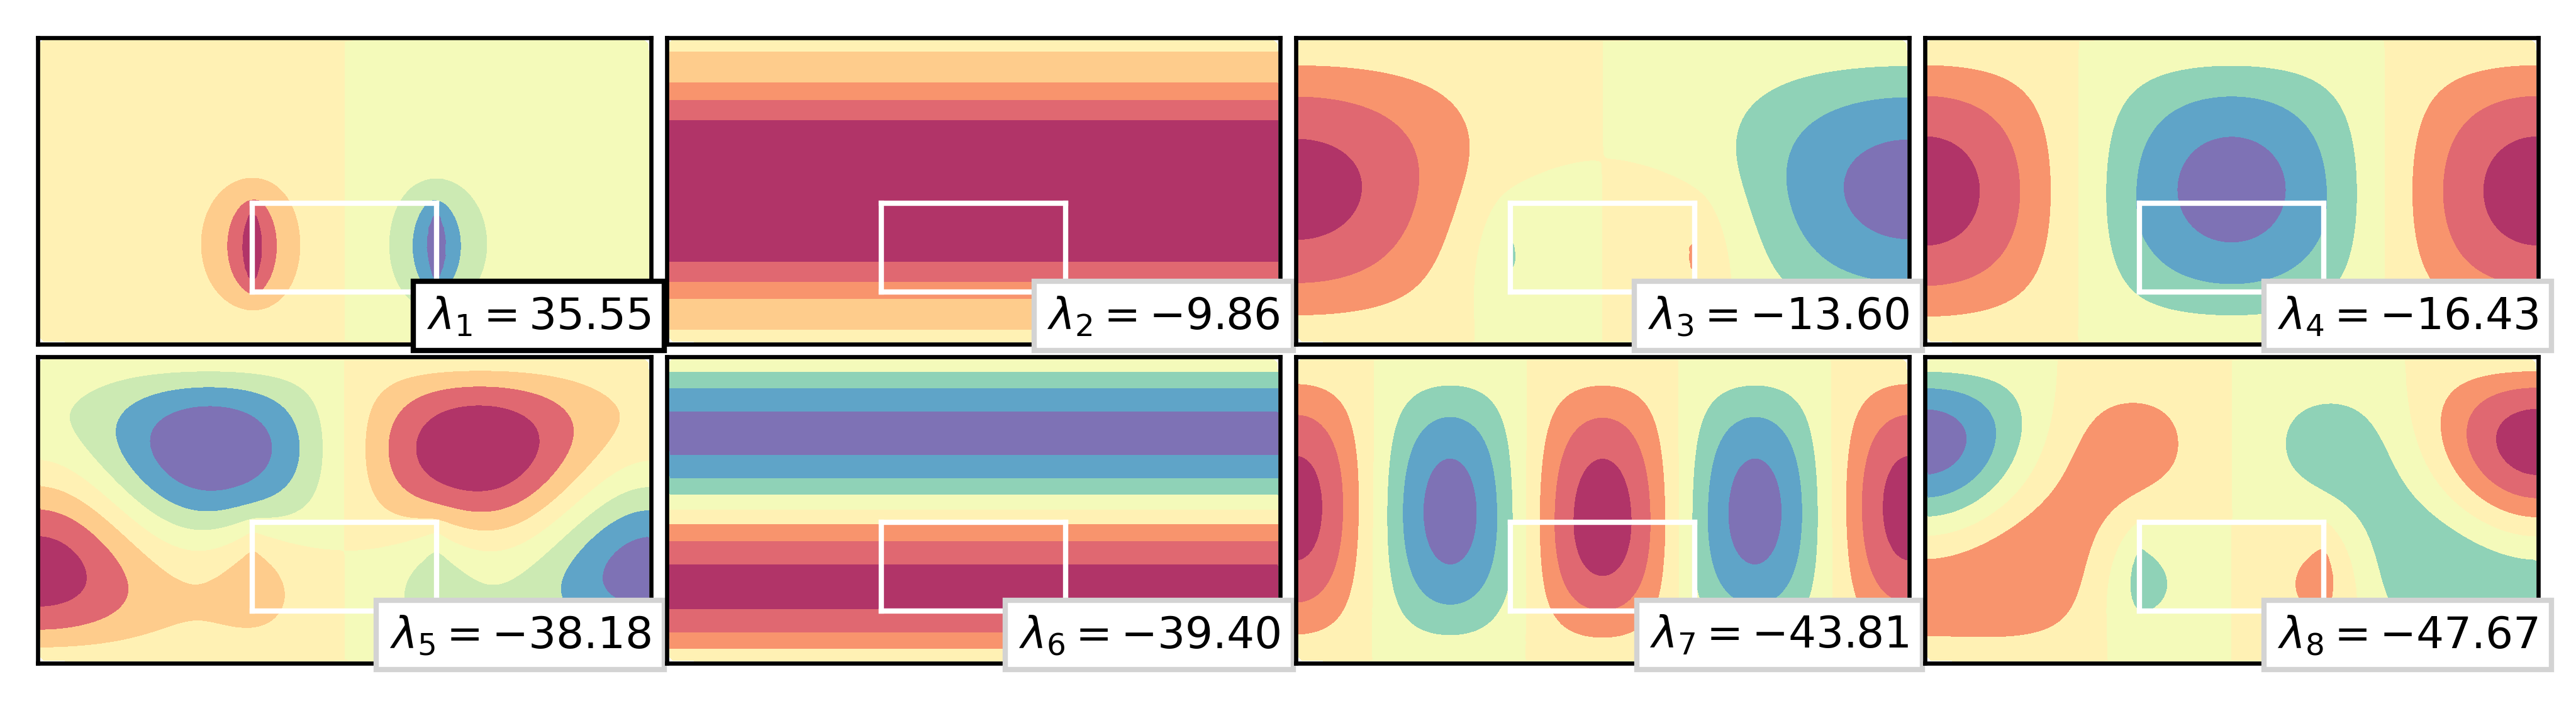

In [18]:
fig,axs = plt.subplots(2,4, figsize=(linewidth, linewidth/4/2*2*1.07))
pb = pbs[f'D5']
peig(pb, axs.flatten())
fig.tight_layout(pad=0.3)
# fig.savefig('../immagini/eig_vg14_D5.png', transparent=1, bbox_inches='tight')

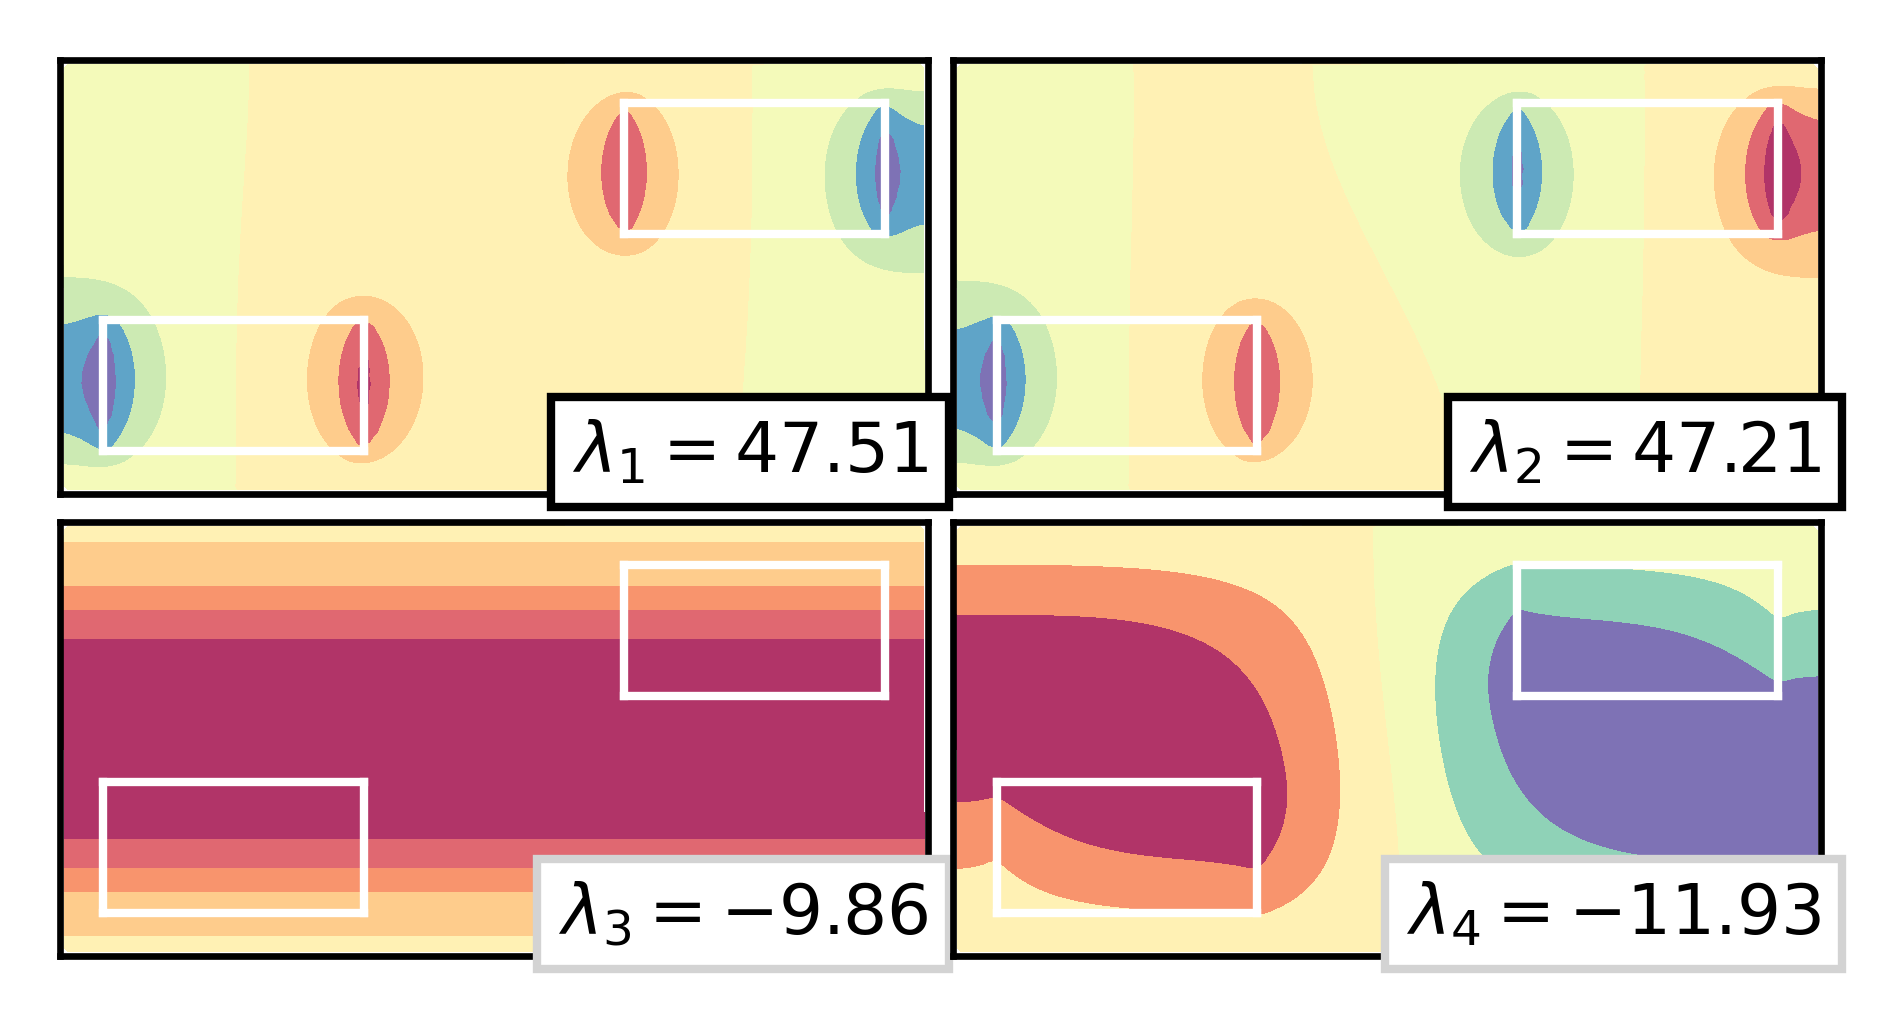

In [19]:
fig,axs = plt.subplots(2,2, figsize=(linewidth*.45, linewidth*.45/2/2*2*1.07))
pb = pbs[f'D8']
peig(pb, axs.flatten())
fig.tight_layout(pad=0.3)
fig.savefig('../immagini/eig_vg14_D8.png', **sf_kw|dict(pad_inches=0.05))

AttributeError: 'NoneType' object has no attribute 'mdg'

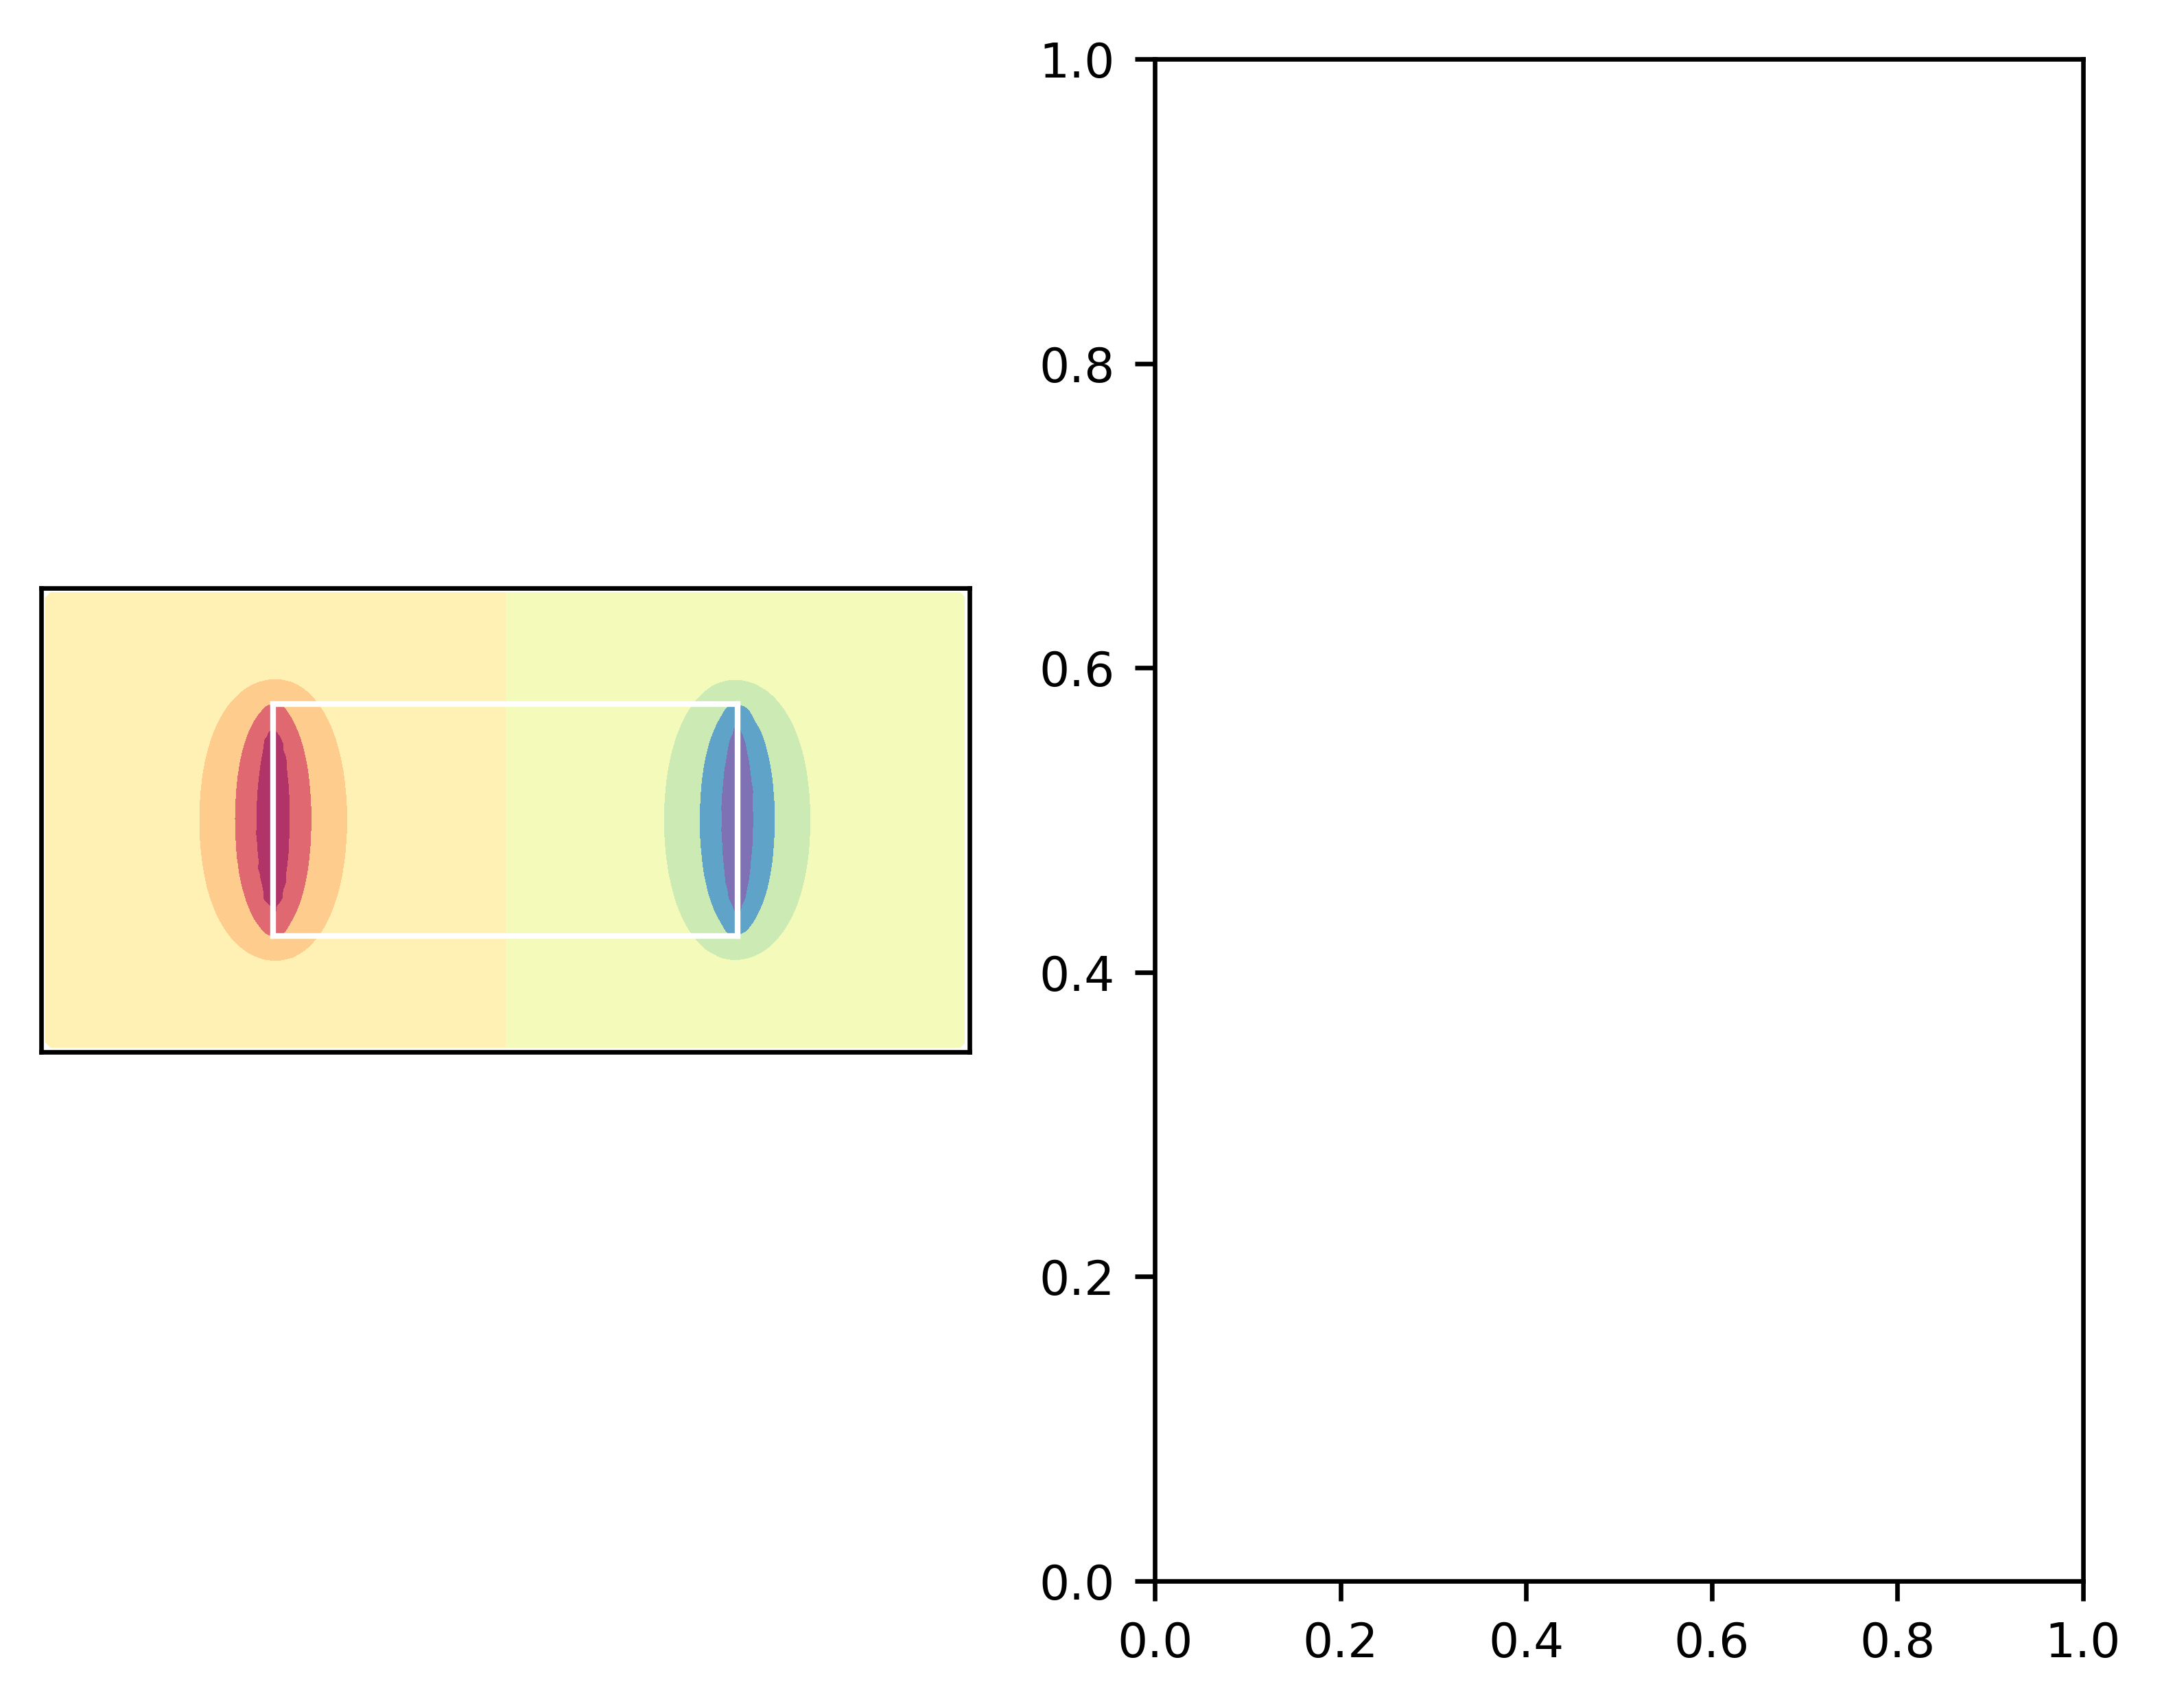

In [20]:
fig,axs = plt.subplots(1,2)

pb = pbs['D11']
fun = pb._eig.funs[:,0]
norm = np.linalg.norm(fun, np.inf)
plot_cells( pb, fun, ax=axs[0], cmap=cmap_dw, method='cubic', Nx=400, vmin=-norm, vmax=norm, fratture_lw=1 )

pb_dir = co.pkl(dict(cartella='../simulazioni', nome='dir_vg14_D11'))
sD = pb_dir.mdg.subdomains()[0]
dw = co.raccogli_stato(pb_dir.mdg, 'concentrazione', sD) - pb_dir._primo_steady_state[pb_dir.dof[sD, 'concentrazione']]
plot_cells( pb_dir, dw, ax=axs[1], cmap=cmap_dw, method='cubic', Nx=400, fratture_lw=1 )

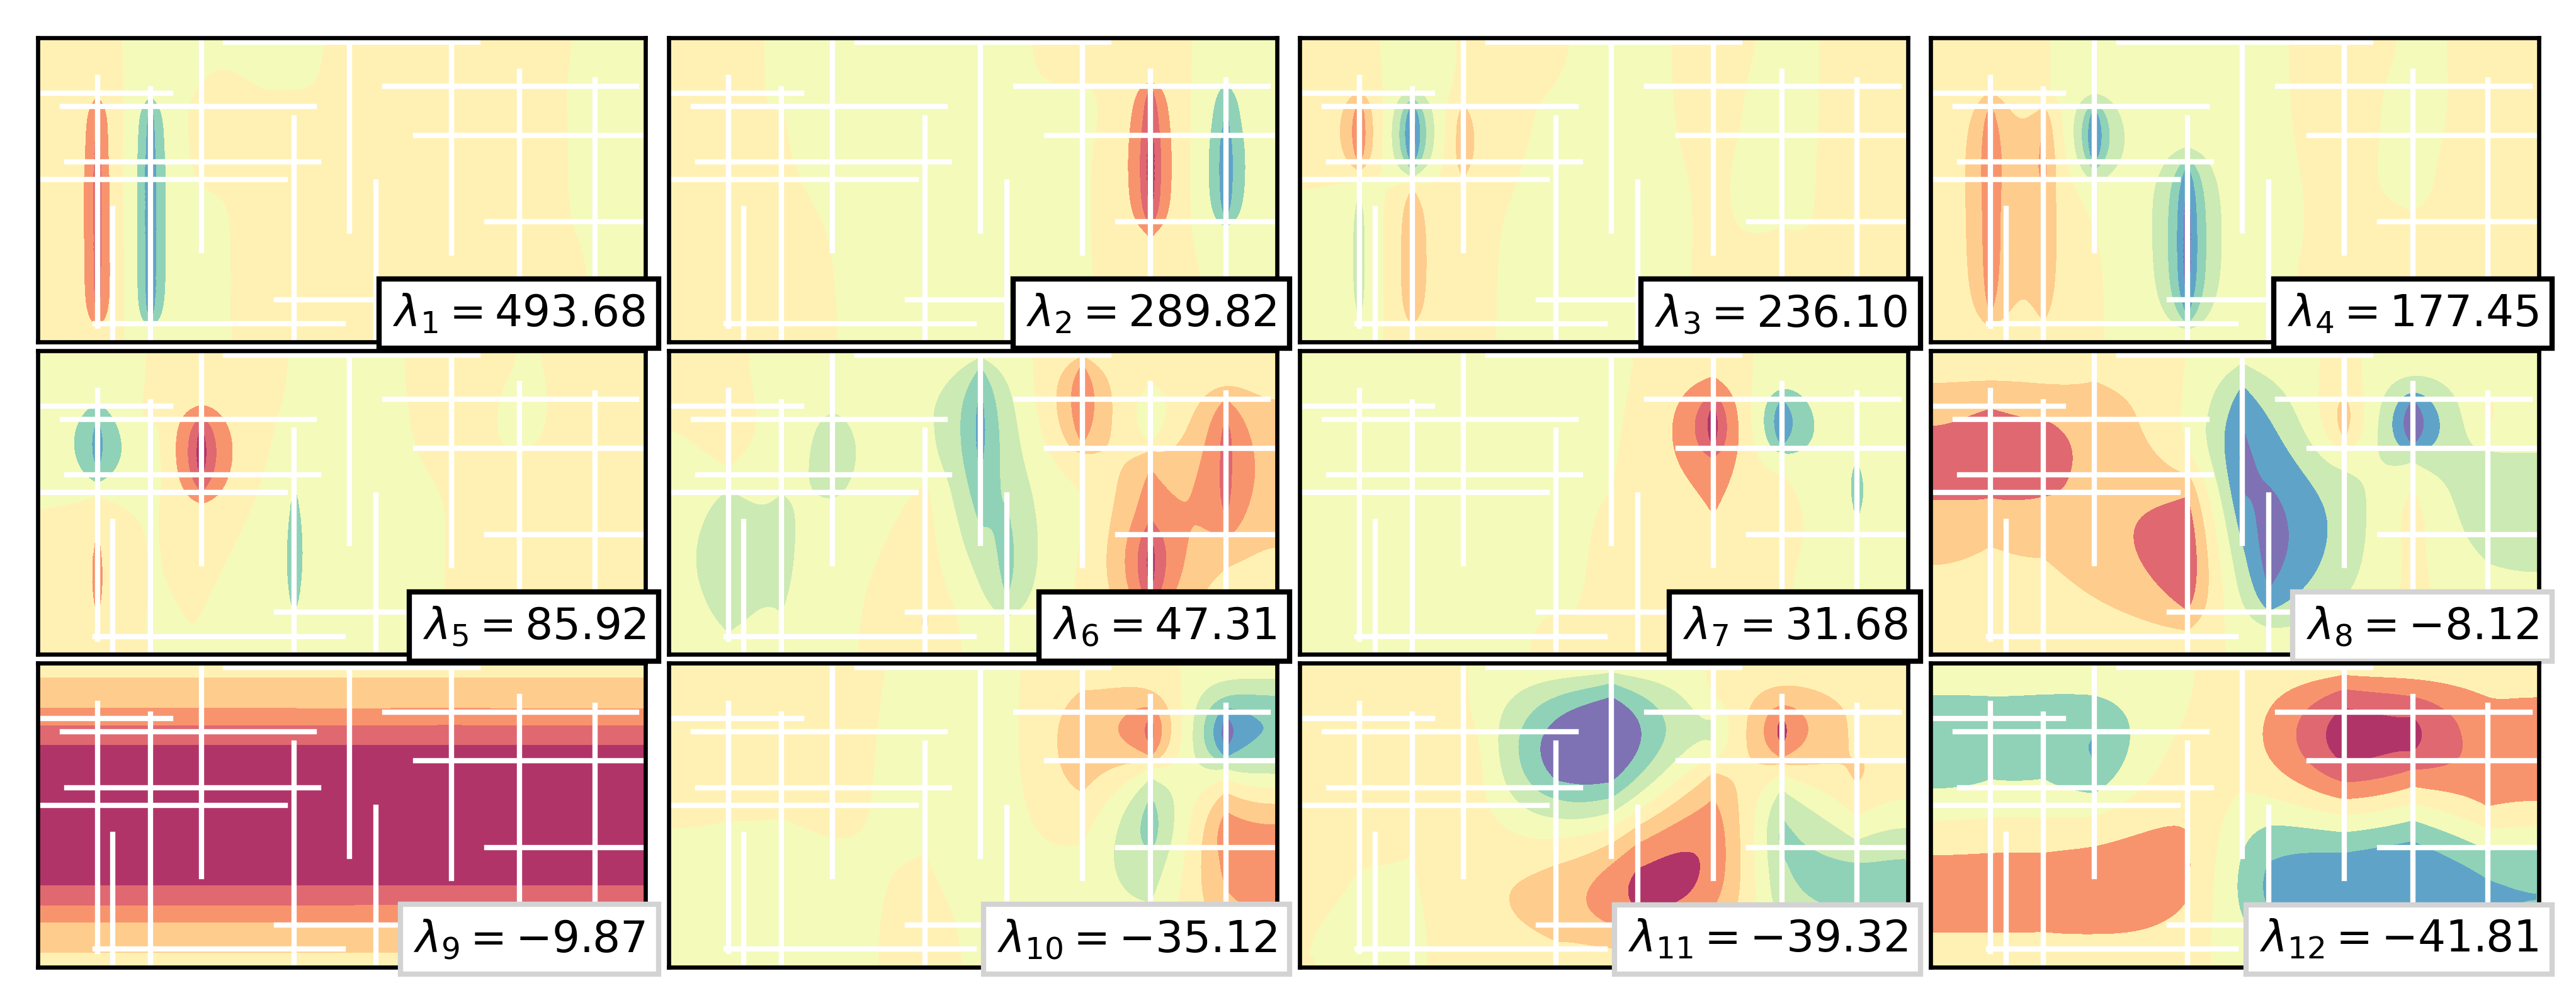

In [21]:
fig,axs = plt.subplots(3,4, figsize=(linewidth,linewidth/4/2*3))

pb = pbs['E9b']
peig(pb, axs.flatten())

fig.tight_layout(pad=0.2)
# fig.savefig('../immagini/eig_vg14_E.png', transparent=1, bbox_inches='tight')

In [ ]:
# n = 2
# coarse = 0.2
# fine = 0.6

# nome = f'C{np.random.randint(10000)}'
# pb = run(nome, dict(lettera='C', numero=n, grid_scale=coarse), dict(k=1))
# fun = pb._eig.funs[:,0]
# ccg = co.raccogli_stato_vec(pb.mdg, 'cc')

# # plot_cells(pb, fun)

# nome = f'C{np.random.randint(10000)}'
# print(nome, end=' ')
# imp = dict(cartella='../simulazioni', nome=nome, parla=4, campi_post=[])
# mdg, dati = hrl.vg14('C', n, grid_scale=fine, tipo_griglia='triangolare')
# pb = hrl.HRL(mdg, dati, imp)
# pb.init()
# print(f'({pb.dof.num})', end=' ')
# pb.steady_state()

# cc = co.raccogli_stato_vec(pb.mdg, 'cc')
# v0 = scipy.interpolate.griddata(ccg[:2].T, fun, cc[:2].T, method='cubic')

# eig = pb.eig(post=0, k=1, v0=v0)
# print(f'({eig.matvec_count}) ', eig.vals)
# pb.esporta(stato=1, pkl=1)


# nome = f'C{np.random.randint(10000)}'
# pb = run(nome, dict(lettera='C', numero=n, grid_scale=fine), dict(k=1))